In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv('OSD-457_DGE (1).csv')

In [4]:
df.head(10)

,ENSEMBL,Symbol,LOG2FC,PVAL,ADJP
0,ENSMUSG00000000001,Gnai3,0.726119,1.004303e-15,3.962346e-15
1,ENSMUSG00000000126,Wnt9a,-2.209758,5.617134e-15,2.144766e-14
2,ENSMUSG00000000214,Th,-7.998439,2.086363e-15,8.106912e-15
3,ENSMUSG00000000318,Clec10a,2.986602,1.642898e-14,6.176906e-14
4,ENSMUSG00000000346,Dazap2,0.413775,1.452395e-13,5.233603e-13
5,ENSMUSG00000000359,Rem1,2.667513,1.135721e-11,3.768794e-11
6,ENSMUSG00000000439,Mkrn2,0.731842,1.161921e-12,4.024782e-12
7,ENSMUSG00000000690,Hoxb6,7.842236,3.366428e-15,1.298078e-14
8,ENSMUSG00000000739,Sult5a1,4.720051,1.060652e-11,3.523901e-11
9,ENSMUSG00000000823,Zfp512b,-1.266578,3.341068e-14,1.239028e-13


In [4]:
df['Symbol'].isnull().sum()

7236

In [5]:
df['Symbol'].value_counts(ascending=True).tail(10).index.to_list()

['Septin2',
 'Nnt',
 'Zfp965',
 'Pik3r3',
 'Fam78a',
 '4933427D14Rik',
 'Pde2a',
 'Erdr1',
 'Gcat',
 'Pakap']

In [6]:
l=df['Symbol'].value_counts(ascending=True).tail(10).index.to_list()

In [7]:
j=[]
for ele in df['Symbol']:
    if ele in l:
        j.append(df[df['Symbol']== ele].index.values)

In [8]:
mask2= df['Symbol']== 'Arfip1'
df[mask2]

,ENSEMBL,Symbol,LOG2FC,PVAL,ADJP
5089,ENSMUSG00000074513,Arfip1,1.10439,3.789131e-35,3.020414e-34
16571,ENSMUSG00000102805,Arfip1,1.68964,2.259674e-02,3.781395e-02


In [9]:
k=[]
for m in range(0,20):
    for n in range (0,2):
        k.append(j[m][n])


In [10]:
df1=df.iloc[k,:]

<Axes: ylabel='Frequency'>

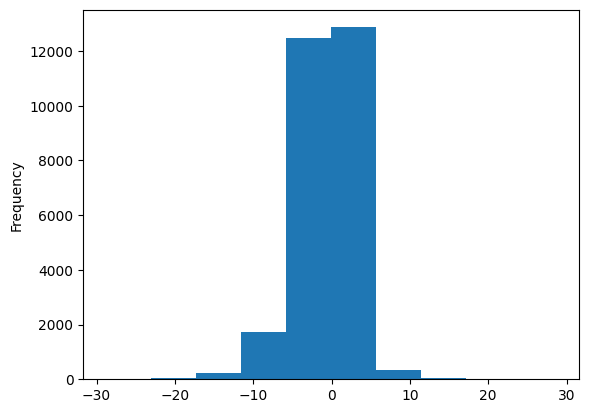

In [11]:
df['LOG2FC'].plot(kind='hist')

<Axes: ylabel='Frequency'>

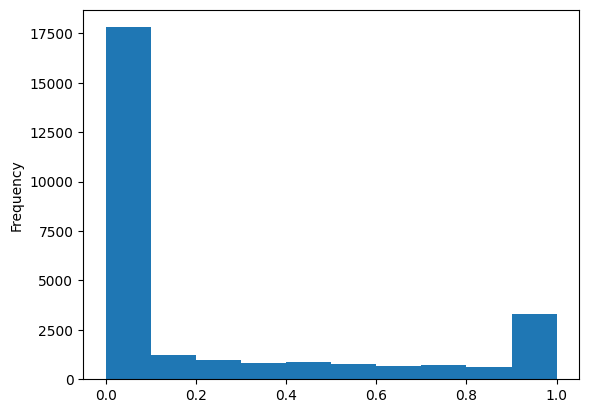

In [12]:
df['ADJP'].plot(kind='hist',bins=10)

In [13]:
import seaborn as sns

C:\Users\Akshat\AppData\Local\Temp\ipykernel_16552\3037215902.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LOG2FC'])


<Axes: xlabel='LOG2FC', ylabel='Density'>

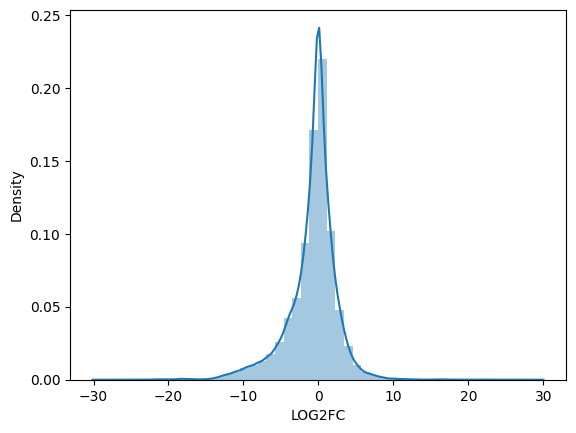

In [14]:
sns.distplot(df['LOG2FC'])

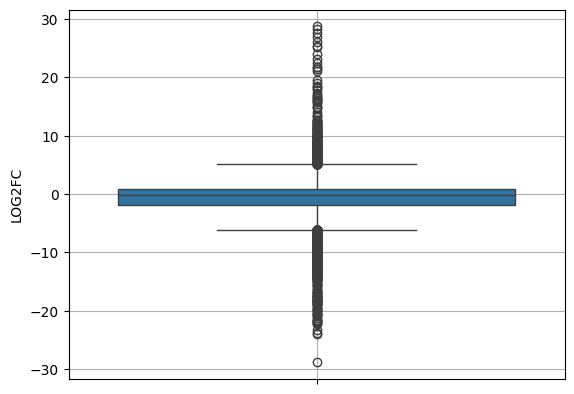

In [15]:
sns.boxplot(df['LOG2FC'])
plt.grid()

(-5e-05, 0.0006)

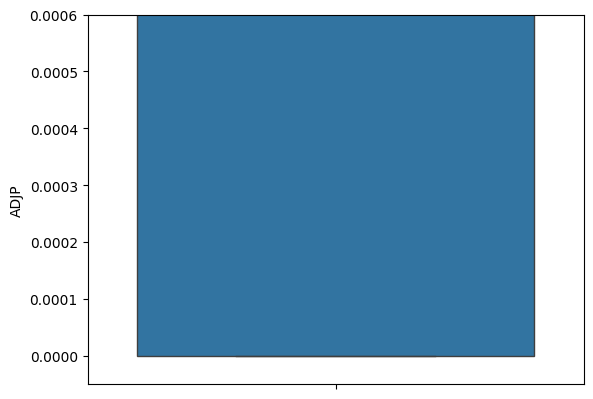

In [16]:
sns.boxplot(df['ADJP'])
plt.ylim(-0.00005,0.0006)

In [17]:
mask3=df['ADJP']<=0.005

In [18]:
df[mask3]

,ENSEMBL,Symbol,LOG2FC,PVAL,ADJP
0,ENSMUSG00000000001,Gnai3,0.726119,1.004303e-15,3.962346e-15
1,ENSMUSG00000000126,Wnt9a,-2.209758,5.617134e-15,2.144766e-14
2,ENSMUSG00000000214,Th,-7.998439,2.086363e-15,8.106912e-15
3,ENSMUSG00000000318,Clec10a,2.986602,1.642898e-14,6.176906e-14
4,ENSMUSG00000000346,Dazap2,0.413775,1.452395e-13,5.233603e-13
...,...,...,...,...,...
14708,ENSMUSG00000015605,Srf,-0.340336,2.641623e-03,4.980453e-03
14709,ENSMUSG00000049799,Lrrc19,-2.800277,2.642875e-03,4.982475e-03
14710,ENSMUSG00000018501,Ncor1,-0.334836,2.647201e-03,4.990292e-03
14711,ENSMUSG00000005540,Fcer2a,3.183480,2.651992e-03,4.998659e-03


In [19]:
df['ADJP'].describe()

count    2.773200e+04
mean     2.295796e-01
std      3.532309e-01
min      0.000000e+00
25%      2.063278e-15
50%      1.469061e-03
75%      3.986805e-01
max      1.000000e+00
Name: ADJP, dtype: float64

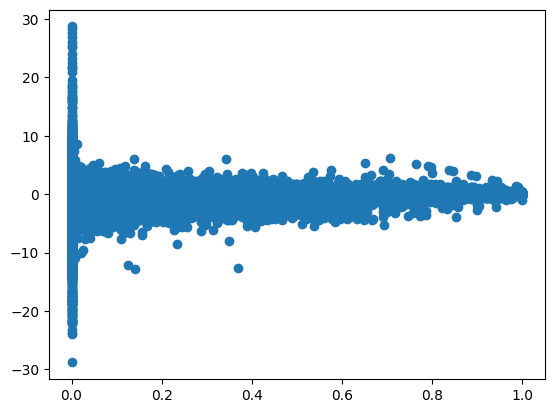

In [20]:
plt.scatter(y=df['LOG2FC'],x=df['ADJP'])

In [21]:
Q1=df['ADJP'].quantile(0.75)-df['ADJP'].quantile(0.25)

([<matplotlib.axis.XTick at 0x24cbf39cd40>,
 [Text(0, 0, 'Gnai3'),
  Text(1, 0, 'Wnt9a'),
  Text(2, 0, 'Th'),
  Text(3, 0, 'Clec10a'),
  Text(4, 0, 'Dazap2')])

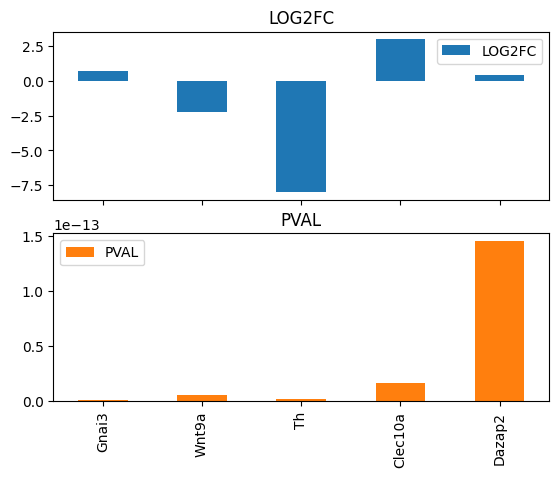

In [22]:
df[["LOG2FC",'PVAL']].iloc[00:5].plot(kind='bar',subplots=True)
plt.xticks(np.arange(0,5),df['Symbol'].iloc[0:5].values)

In [23]:
df['ADJP'].describe()

count    2.773200e+04
mean     2.295796e-01
std      3.532309e-01
min      0.000000e+00
25%      2.063278e-15
50%      1.469061e-03
75%      3.986805e-01
max      1.000000e+00
Name: ADJP, dtype: float64

In [24]:
df['LOG2FC'].describe()

count    27732.000000
mean        -0.758259
std          3.335157
min        -28.830937
25%         -1.903259
50%         -0.155727
75%          0.889251
max         28.728203
Name: LOG2FC, dtype: float64

In [25]:
df1.describe()

,LOG2FC,PVAL,ADJP
count,40.000000,4.000000e+01,4.000000e+01
mean,-0.370265,1.058507e-01,1.385467e-01
std,2.180822,1.692443e-01,2.122668e-01
min,-3.914963,5.061708e-77,1.388440e-75
25%,-2.289495,3.526455e-16,1.418512e-15
50%,-0.541899,8.087485e-05,1.747559e-04
75%,1.284292,1.629382e-01,2.329845e-01
max,4.174643,5.669918e-01,6.840903e-01


In [26]:
df['-LOG10_ADJP']=-np.log10(df['ADJP'])

C:\Users\Akshat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [27]:
a=[]
for i in range(0,df.shape[0]):
    if df['-LOG10_ADJP'][i]>1.30 and df['LOG2FC'][i]<-1:
        a.append(1)
    elif df['-LOG10_ADJP'][i]<=1.30 and df['LOG2FC'][i]<=1:
        a.append(0)
    elif df['-LOG10_ADJP'][i]>1.30 and df['LOG2FC'][i]>1:

        a.append(2)
    else:
        a.append(0)
    

In [28]:
len(a)

27732

In [29]:
df['Class']=a

Text(0.5, 1.0, 'Gene Dysregulation Plot')

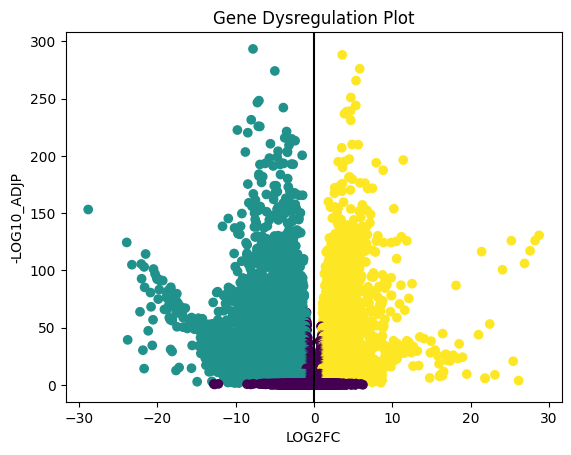

In [213]:
plt.scatter(df['LOG2FC'],df['-LOG10_ADJP'],c=df['Class'])
plt.axvline(0,color='black')
plt.xlabel('LOG2FC')
plt.ylabel('-LOG10_ADJP')
plt.title('Gene Dysregulation Plot')


In [31]:
df['-LOG10_ADJP'].describe()

C:\Users\Akshat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    2.773200e+04
mean              inf
std               NaN
min     -0.000000e+00
25%      3.993750e-01
50%      2.832960e+00
75%      1.468544e+01
max               inf
Name: -LOG10_ADJP, dtype: float64

In [32]:
import seaborn as sns

In [33]:
df2=df.iloc[:9,1:6]

In [34]:
df2

,Symbol,LOG2FC,PVAL,ADJP,-LOG10_ADJP
0,Gnai3,0.726119,1.004303e-15,3.962346e-15,14.402048
1,Wnt9a,-2.209758,5.617134e-15,2.144766e-14,13.668620
2,Th,-7.998439,2.086363e-15,8.106912e-15,14.091145
3,Clec10a,2.986602,1.642898e-14,6.176906e-14,13.209229
4,Dazap2,0.413775,1.452395e-13,5.233603e-13,12.281199
5,Rem1,2.667513,1.135721e-11,3.768794e-11,10.423798
6,Mkrn2,0.731842,1.161921e-12,4.024782e-12,11.395258
7,Hoxb6,7.842236,3.366428e-15,1.298078e-14,13.886699
8,Sult5a1,4.720051,1.060652e-11,3.523901e-11,10.452976


In [35]:
df2.pivot_table(index=df2['Symbol'],columns=df2['Symbol'].values,values=df2['-LOG10_ADJP']+df2['LOG2FC'])

KeyError: 15.128166963708662

AttributeError: module 'seaborn' has no attribute 'show'

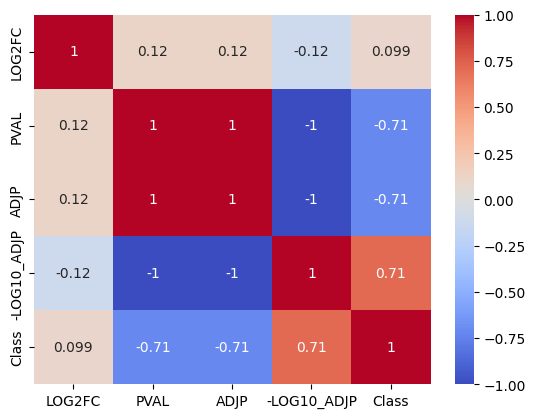

In [ ]:
expression_values = df.iloc[:, 2:]

# Calculate the correlation matrix (using Spearman rank correlation)
correlation_matrix = expression_values.corr(method='spearman')

# Create a heatmap using seaborn library
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)  # Add annotations for correlation values
sns.show()

In [ ]:
df4=pd.DataFrame(columns=df2['Symbol'])

In [ ]:
df5=df4.T

In [36]:
df5['1']=df2['LOG2FC']#*df2['-LOG10_ADJP']

NameError: name 'df5' is not defined

In [37]:
df4=df5.T

NameError: name 'df5' is not defined

In [38]:
df4.pivot_table(columns=df2['Symbol'],index=df2['Symbol'],values=df5['1'])

NameError: name 'df4' is not defined

In [39]:
df5['1']=0

NameError: name 'df5' is not defined

In [40]:
df2['SUM']=df2['-LOG10_ADJP']+df2['LOG2FC']

In [41]:
df2

,Symbol,LOG2FC,PVAL,ADJP,-LOG10_ADJP,SUM
0,Gnai3,0.726119,1.004303e-15,3.962346e-15,14.402048,15.128167
1,Wnt9a,-2.209758,5.617134e-15,2.144766e-14,13.668620,11.458862
2,Th,-7.998439,2.086363e-15,8.106912e-15,14.091145,6.092706
3,Clec10a,2.986602,1.642898e-14,6.176906e-14,13.209229,16.195831
4,Dazap2,0.413775,1.452395e-13,5.233603e-13,12.281199,12.694974
5,Rem1,2.667513,1.135721e-11,3.768794e-11,10.423798,13.091311
6,Mkrn2,0.731842,1.161921e-12,4.024782e-12,11.395258,12.127100
7,Hoxb6,7.842236,3.366428e-15,1.298078e-14,13.886699,21.728935
8,Sult5a1,4.720051,1.060652e-11,3.523901e-11,10.452976,15.173027


In [42]:
(15-12)/2


1.5

In [43]:
df3=pd.DataFrame(columns=df2['Symbol'].values,index=df2['Symbol'].values)

In [44]:
df3[df3.columns[2]]=np.arange(0,9)

In [45]:
df3

,Gnai3,Wnt9a,Th,Clec10a,Dazap2,Rem1,Mkrn2,Hoxb6,Sult5a1
Gnai3,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
Wnt9a,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
Th,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
Clec10a,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
Dazap2,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
Rem1,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN
Mkrn2,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN
Hoxb6,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN
Sult5a1,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
for i in range(df2.shape[0]):
    l=[]
    for j in range(df2.shape[0]):
        l.append(abs(df2['SUM'][i]-df2['SUM'][j]))
    df3[df3.columns[i]]=l

    

In [47]:
for i in range(df2.shape[0]):
    print(abs(df2['SUM'][0]-df2['SUM'][i]))

0.0
3.6693052068086303
9.03546130802723
1.0676642754917438
2.4331930429272877
2.0368561760481985
3.001067421130527
6.600767818105396
0.04486010620578895


In [48]:
df3

,Gnai3,Wnt9a,Th,Clec10a,Dazap2,Rem1,Mkrn2,Hoxb6,Sult5a1
Gnai3,0.000000,3.669305,9.035461,1.067664,2.433193,2.036856,3.001067,6.600768,0.044860
Wnt9a,3.669305,0.000000,5.366156,4.736969,1.236112,1.632449,0.668238,10.270073,3.714165
Th,9.035461,5.366156,0.000000,10.103126,6.602268,6.998605,6.034394,15.636229,9.080321
Clec10a,1.067664,4.736969,10.103126,0.000000,3.500857,3.104520,4.068732,5.533104,1.022804
Dazap2,2.433193,1.236112,6.602268,3.500857,0.000000,0.396337,0.567874,9.033961,2.478053
Rem1,2.036856,1.632449,6.998605,3.104520,0.396337,0.000000,0.964211,8.637624,2.081716
Mkrn2,3.001067,0.668238,6.034394,4.068732,0.567874,0.964211,0.000000,9.601835,3.045928
Hoxb6,6.600768,10.270073,15.636229,5.533104,9.033961,8.637624,9.601835,0.000000,6.555908
Sult5a1,0.044860,3.714165,9.080321,1.022804,2.478053,2.081716,3.045928,6.555908,0.000000


<Axes: >

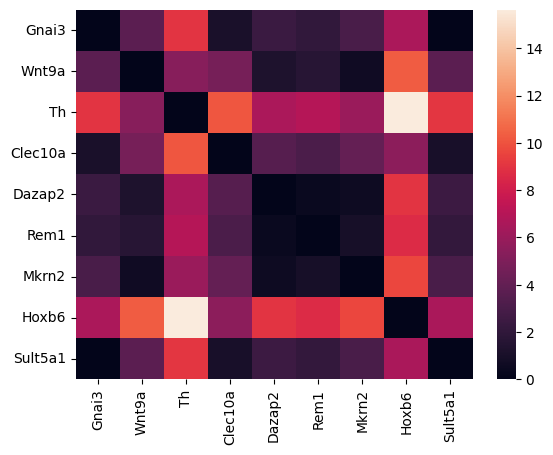

In [49]:
sns.heatmap(df3)

In [50]:
df['SUM'].describe()

KeyError: 'SUM'

In [ ]:
df['SUM']=df['LOG2FC']+df['-LOG10_ADJP']

In [51]:
k=[]
for ele in df["SUM"]:
    if ele<=200:
        k.append(ele)
    else:
        k.append(200)

KeyError: 'SUM'

In [52]:
df['SUM']=k

ValueError: Length of values (0) does not match length of index (27732)

In [53]:
mask4=df['PVAL']<=0.05
df5=df[mask4]

In [54]:
df6=df5.sort_values(by='LOG2FC')

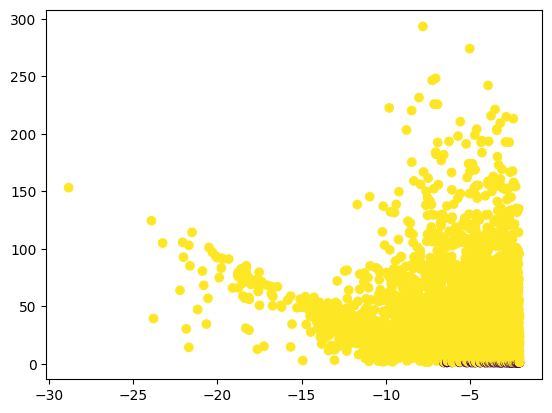

In [209]:
plt.scatter(y=df6['-LOG10_ADJP'].head(6000),x=df6['LOG2FC'].head(6000), c=df6['Class'].head(6000))

In [56]:
df6

,ENSEMBL,Symbol,LOG2FC,PVAL,ADJP,-LOG10_ADJP,Class
1726,ENSMUSG00000100862,Gm10925,-28.830937,2.714803e-156,6.490251e-154,153.187739,1
1855,ENSMUSG00000028782,Adgrb2,-23.913538,3.111346e-127,3.521790e-125,124.453237,1
4484,ENSMUSG00000037771,Slc32a1,-23.790903,4.506758e-41,4.348693e-40,39.361641,1
2026,ENSMUSG00000027525,Phactr3,-23.249410,1.503270e-107,1.002132e-105,104.999075,1
3028,ENSMUSG00000067038,Rps12-ps3,-22.215613,6.997415e-66,1.368493e-64,63.863757,1
...,...,...,...,...,...,...,...
12657,ENSMUSG00000081221,Gm14760,26.113803,7.543247e-05,1.652625e-04,3.781826,2
2014,ENSMUSG00000038754,Elovl3,26.870668,1.112590e-108,7.637216e-107,106.117065,2
1914,ENSMUSG00000059201,Lep,27.575706,7.816616e-120,7.130605e-118,117.146874,2
1836,ENSMUSG00000022878,Adipoq,28.217161,7.344133e-129,9.011836e-127,126.045187,2


In [57]:
df7=pd.concat([df6.head(5),df6.tail(5)],axis=0)

In [81]:
df7['SUM']=df7['-LOG10_ADJP']+df7['LOG2FC']

In [82]:
df7.reset_index(inplace=True)

In [83]:
heatmap_df1=pd.DataFrame(index=df7['Symbol'],columns=df7['Symbol'])

In [85]:
df7.shape[0]

10

In [86]:
df7

,level_0,index,ENSEMBL,Symbol,LOG2FC,PVAL,ADJP,-LOG10_ADJP,Class,SUM
0,0,1726,ENSMUSG00000100862,Gm10925,-28.830937,2.714803e-156,6.490251e-154,153.187739,1,124.356801
1,1,1855,ENSMUSG00000028782,Adgrb2,-23.913538,3.111346e-127,3.521790e-125,124.453237,1,100.539698
2,2,4484,ENSMUSG00000037771,Slc32a1,-23.790903,4.506758e-41,4.348693e-40,39.361641,1,15.570738
3,3,2026,ENSMUSG00000027525,Phactr3,-23.249410,1.503270e-107,1.002132e-105,104.999075,1,81.749665
4,4,3028,ENSMUSG00000067038,Rps12-ps3,-22.215613,6.997415e-66,1.368493e-64,63.863757,1,41.648145
5,5,12657,ENSMUSG00000081221,Gm14760,26.113803,7.543247e-05,1.652625e-04,3.781826,2,29.895629
6,6,2014,ENSMUSG00000038754,Elovl3,26.870668,1.112590e-108,7.637216e-107,106.117065,2,132.987733
7,7,1914,ENSMUSG00000059201,Lep,27.575706,7.816616e-120,7.130605e-118,117.146874,2,144.722580
8,8,1836,ENSMUSG00000022878,Adipoq,28.217161,7.344133e-129,9.011836e-127,126.045187,2,154.262348
9,9,1805,ENSMUSG00000030278,Cidec,28.728203,1.518264e-133,2.159205e-131,130.665706,2,159.393909


In [89]:
for i in range(df7.shape[0]):
    l=[]
    for j in range(df7.shape[0]):
        l.append((abs(df7['SUM'][i]-df7['SUM'][j])-150)*-1)
    heatmap_df1[heatmap_df1.columns[i]]=l


In [90]:
heatmap_df1

Symbol,Gm10925,Adgrb2,Slc32a1,Phactr3,Rps12-ps3,Gm14760,Elovl3,Lep,Adipoq,Cidec
Symbol,,,,,,,,,,
Gm10925,150.000000,126.182897,41.213937,107.392863,67.291344,55.538828,141.369068,129.634221,120.094454,114.962893
Adgrb2,126.182897,150.000000,65.031040,131.209966,91.108446,79.355930,117.551966,105.817119,96.277351,91.145790
Slc32a1,41.213937,65.031040,150.000000,83.821074,123.922594,135.675110,32.583006,20.848159,11.308391,6.176830
Phactr3,107.392863,131.209966,83.821074,150.000000,109.898480,98.145964,98.761932,87.027085,77.487317,72.355756
Rps12-ps3,67.291344,91.108446,123.922594,109.898480,150.000000,138.247484,58.660412,46.925565,37.385797,32.254236
Gm14760,55.538828,79.355930,135.675110,98.145964,138.247484,150.000000,46.907896,35.173049,25.633281,20.501720
Elovl3,141.369068,117.551966,32.583006,98.761932,58.660412,46.907896,150.000000,138.265153,128.725385,123.593824
Lep,129.634221,105.817119,20.848159,87.027085,46.925565,35.173049,138.265153,150.000000,140.460232,135.328671
Adipoq,120.094454,96.277351,11.308391,77.487317,37.385797,25.633281,128.725385,140.460232,150.000000,144.868439


<Axes: xlabel='Symbol', ylabel='Symbol'>

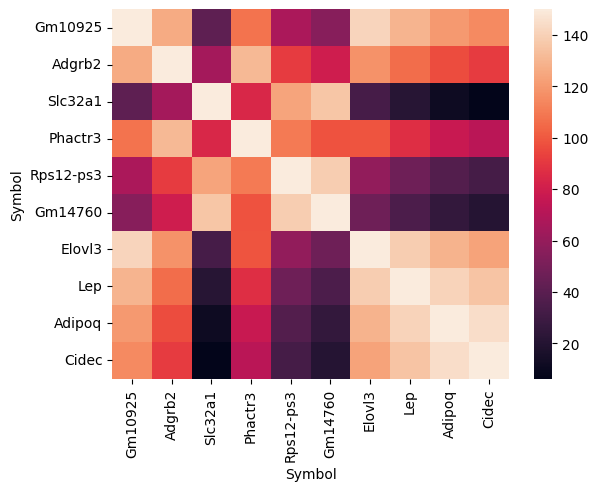

In [91]:
sns.heatmap(heatmap_df1)

<Axes: xlabel='Symbol', ylabel='Symbol'>

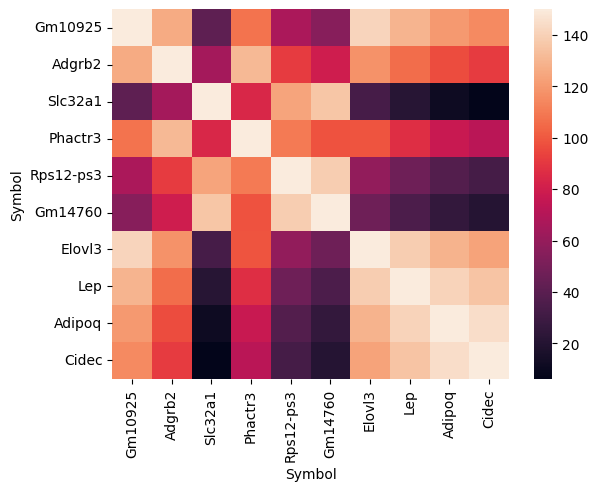

In [92]:
sns.heatmap(heatmap_df1)

Text(0.5, 1.0, '10 most dysregulated genes relative expression')

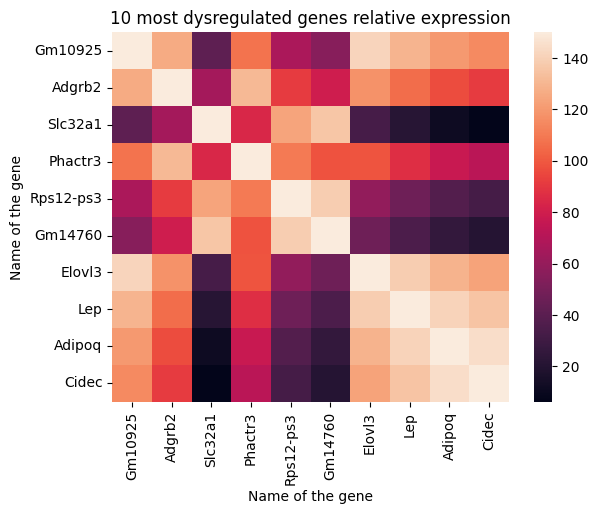

In [228]:
sns.heatmap(heatmap_df1)
plt.xlabel('Name of the gene')
plt.ylabel('Name of the gene')
plt.title('10 most dysregulated genes relative expression')

In [94]:
df6.iloc[6:11]

,ENSEMBL,Symbol,LOG2FC,PVAL,ADJP,-LOG10_ADJP,Class
2187,ENSMUSG00000031376,Atp2b3,-22.014225,3.827212e-95,1.839450e-93,92.735312,1
5462,ENSMUSG00000038255,Neurod2,-21.845792,6.532139e-32,4.702733e-31,30.327650,1
725,ENSMUSG00000035383,Pmch,-21.692454,1.428004e-15,5.598954e-15,14.251893,1
2047,ENSMUSG00000033998,Kcnk1,-21.688683,1.383026e-105,8.776677e-104,103.056670,1
2352,ENSMUSG00000056296,Synpr,-21.627107,1.598644e-87,5.974876e-86,85.223671,1


In [95]:
df6.tail(10).iloc[0:5]

,ENSEMBL,Symbol,LOG2FC,PVAL,ADJP,-LOG10_ADJP,Class
3545,ENSMUSG00000028972,Car6,22.426466,4.425518e-55,6.342556e-54,53.197736,2
9089,ENSMUSG00000078889,Gm14288,23.086779,4.827869e-10,1.475983e-09,8.830919,2
2073,ENSMUSG00000001657,Hoxc8,24.057376,4.422181e-103,2.648724e-101,100.576963,2
1838,ENSMUSG00000110613,Lncbate1,25.185542,8.937902e-129,1.087131e-126,125.963718,2
7125,ENSMUSG00000078087,Rps12l1,25.416738,4.113621e-22,2.068521e-21,20.684340,2


In [96]:
df9=pd.concat([df6.iloc[6:11],df6.tail(10).iloc[0:5]])

In [97]:
heatmap_df2

Symbol,Atp2b3,Neurod2,Pmch,Kcnk1,Synpr,Car6,Gm14288,Hoxc8,Lncbate1,Rps12l1
Symbol,,,,,,,,,,
Atp2b3,150.000000,87.760771,71.838352,139.353100,142.875476,145.096886,111.196610,96.086749,69.571828,125.379991
Neurod2,87.760771,150.000000,134.077581,77.113871,94.885294,82.857656,126.564161,33.847519,7.332598,112.380780
Pmch,71.838352,134.077581,150.000000,61.191452,78.962875,66.935237,110.641742,17.925100,-8.589821,96.458361
Kcnk1,139.353100,77.113871,61.191452,150.000000,132.228576,144.256214,100.549710,106.733648,80.218727,114.733091
Synpr,142.875476,94.885294,78.962875,132.228576,150.000000,137.972362,118.321134,88.962225,62.447304,132.504514
Car6,145.096886,82.857656,66.935237,144.256214,137.972362,150.000000,106.293496,100.989863,74.474942,120.476876
Gm14288,111.196610,126.564161,110.641742,100.549710,118.321134,106.293496,150.000000,57.283358,30.768437,135.816619
Hoxc8,96.086749,33.847519,17.925100,106.733648,88.962225,100.989863,57.283358,150.000000,123.485079,71.466739
Lncbate1,69.571828,7.332598,-8.589821,80.218727,62.447304,74.474942,30.768437,123.485079,150.000000,44.951818


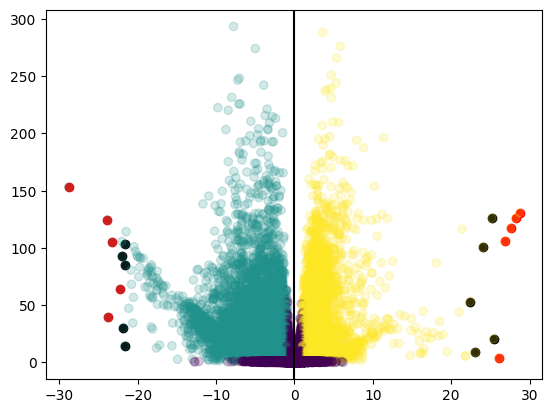

In [98]:
plt.scatter(y=df7['-LOG10_ADJP'], x=df7['LOG2FC'],color='red')
plt.scatter(y=df9['-LOG10_ADJP'], x=df9['LOG2FC'],color='black')
plt.scatter(df['LOG2FC'],df['-LOG10_ADJP'],c=df['Class'],alpha=0.2)
plt.axvline(0,color='black')

In [99]:
df9

,ENSEMBL,Symbol,LOG2FC,PVAL,ADJP,-LOG10_ADJP,Class
2187,ENSMUSG00000031376,Atp2b3,-22.014225,3.827212e-95,1.839450e-93,92.735312,1
5462,ENSMUSG00000038255,Neurod2,-21.845792,6.532139e-32,4.702733e-31,30.327650,1
725,ENSMUSG00000035383,Pmch,-21.692454,1.428004e-15,5.598954e-15,14.251893,1
2047,ENSMUSG00000033998,Kcnk1,-21.688683,1.383026e-105,8.776677e-104,103.056670,1
2352,ENSMUSG00000056296,Synpr,-21.627107,1.598644e-87,5.974876e-86,85.223671,1
3545,ENSMUSG00000028972,Car6,22.426466,4.425518e-55,6.342556e-54,53.197736,2
9089,ENSMUSG00000078889,Gm14288,23.086779,4.827869e-10,1.475983e-09,8.830919,2
2073,ENSMUSG00000001657,Hoxc8,24.057376,4.422181e-103,2.648724e-101,100.576963,2
1838,ENSMUSG00000110613,Lncbate1,25.185542,8.937902e-129,1.087131e-126,125.963718,2
7125,ENSMUSG00000078087,Rps12l1,25.416738,4.113621e-22,2.068521e-21,20.684340,2


In [100]:
heatmap_df2=pd.DataFrame(index=df9['Symbol'],columns=df9['Symbol'])

In [101]:
df9.reset_index(inplace=True)

In [102]:
df9['SUM']=df9['-LOG10_ADJP']+df9['LOG2FC']

In [103]:
for i in range(df9.shape[0]):
    l=[]
    for j in range(df9.shape[0]):
        l.append((abs(df9['SUM'][i]-df9['SUM'][j])-150)*-1)
    heatmap_df2[heatmap_df2.columns[i]]=l


In [104]:
heatmap_df2

Symbol,Atp2b3,Neurod2,Pmch,Kcnk1,Synpr,Car6,Gm14288,Hoxc8,Lncbate1,Rps12l1
Symbol,,,,,,,,,,
Atp2b3,150.000000,87.760771,71.838352,139.353100,142.875476,145.096886,111.196610,96.086749,69.571828,125.379991
Neurod2,87.760771,150.000000,134.077581,77.113871,94.885294,82.857656,126.564161,33.847519,7.332598,112.380780
Pmch,71.838352,134.077581,150.000000,61.191452,78.962875,66.935237,110.641742,17.925100,-8.589821,96.458361
Kcnk1,139.353100,77.113871,61.191452,150.000000,132.228576,144.256214,100.549710,106.733648,80.218727,114.733091
Synpr,142.875476,94.885294,78.962875,132.228576,150.000000,137.972362,118.321134,88.962225,62.447304,132.504514
Car6,145.096886,82.857656,66.935237,144.256214,137.972362,150.000000,106.293496,100.989863,74.474942,120.476876
Gm14288,111.196610,126.564161,110.641742,100.549710,118.321134,106.293496,150.000000,57.283358,30.768437,135.816619
Hoxc8,96.086749,33.847519,17.925100,106.733648,88.962225,100.989863,57.283358,150.000000,123.485079,71.466739
Lncbate1,69.571828,7.332598,-8.589821,80.218727,62.447304,74.474942,30.768437,123.485079,150.000000,44.951818


<Axes: xlabel='Symbol', ylabel='Symbol'>

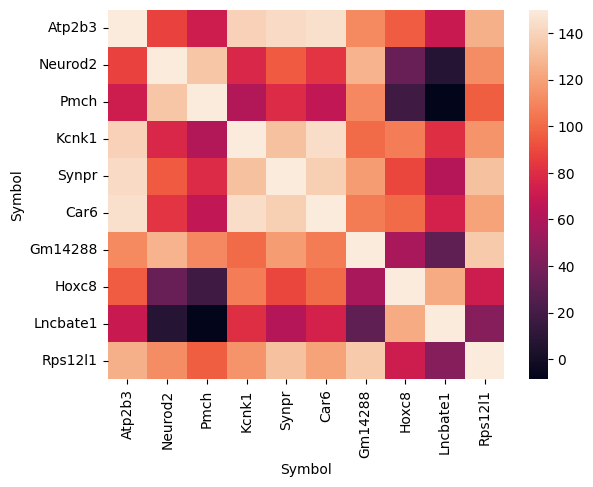

In [105]:
sns.heatmap(heatmap_df2)

In [5]:
def GeneExpression():
    global df
    s=str(input('If you have a name for the gene of interest press y. Else press n and you would be directed to fill in the adjusted P-value and LOG2FC value of your gene '))
    if s=='y':
        y=str(input('Enter the correct name of your gene of interest'))
        if y in df['Symbol'].values:
            print('yay')
        else:
            print('nah')
            

In [6]:
GeneExpression()

yay


In [ ]:
mask1=df

In [112]:
mask1=df['Symbol']=='Muc5b'
mask2=df['Symbol']=='Vdr'
mask3=df['Symbol']=='Ahr'
mask4=df['Symbol']=='Cyp1a2'
mask5=df['Symbol']=='Cyp2e1'
mask6=df['Symbol']=='Muc2'
mask7=df['Symbol']=='Pgp'

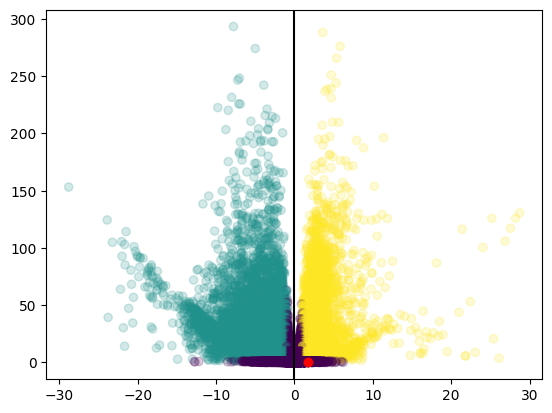

In [79]:
plt.scatter(y=df['-LOG10_ADJP'],x=df['LOG2FC'],c=df['Class'],alpha=0.2)
plt.axvline(0,color='black')
plt.scatter(y=df[df['Symbol']=='Muc5b']['-LOG10_ADJP'],x=df[df['Symbol']=='Muc5b']['LOG2FC'],color='red')


In [229]:
df_007=df[mask1|mask2|mask3|mask4|mask5|mask6]
df_007.reset_index(inplace=True)
df_007['-LOG10_ADJP']=df_007['-LOG10_ADJP']*5

C:\Users\Akshat\AppData\Local\Temp\ipykernel_16552\3125941712.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_007['-LOG10_ADJP']=df_007['-LOG10_ADJP']*5


In [230]:
df_007

,index,ENSEMBL,Symbol,LOG2FC,PVAL,ADJP,-LOG10_ADJP,Class
0,3519,ENSMUSG00000025479,Cyp2e1,6.775865,1.245948e-55,1.809986e-54,268.711624,2
1,6251,ENSMUSG00000025515,Muc2,3.921684,1.314853e-26,7.856820e-26,125.523766,2
2,11355,ENSMUSG00000019256,Ahr,1.039493,3.099972e-06,7.570308e-06,25.604432,2
3,15067,ENSMUSG00000032310,Cyp1a2,3.749040,4.305632e-03,7.924328e-03,10.505188,2
4,21292,ENSMUSG00000022479,Vdr,0.414889,3.518915e-01,4.583034e-01,1.694235,0
5,21473,ENSMUSG00000066108,Muc5b,1.727349,3.707782e-01,4.788127e-01,1.599172,0


In [231]:
df_007['SUM']=df_007['-LOG10_ADJP']+df_007['LOG2FC']

C:\Users\Akshat\AppData\Local\Temp\ipykernel_16552\1265646388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_007['SUM']=df_007['-LOG10_ADJP']+df_007['LOG2FC']


Text(0.5, 1.0, 'Fold Change observed')

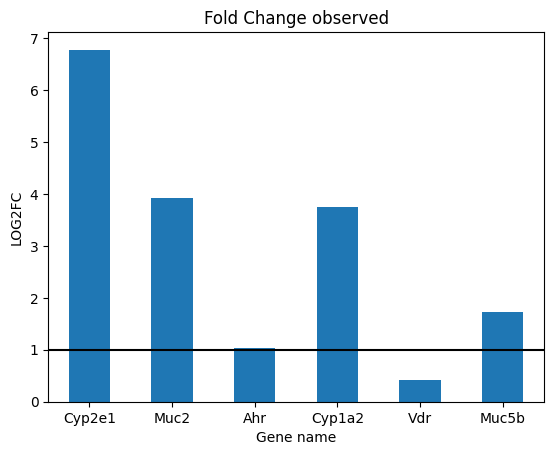

In [237]:
df_007['LOG2FC'].plot(kind='bar')
plt.xticks(np.arange(0,6), df_007['Symbol'])
plt.xticks(rotation='horizontal')
plt.axhline(1,color='black')
plt.ylabel('LOG2FC')
plt.xlabel('Gene name')
plt.title('Fold Change observed')

In [233]:
-np.log10(0.5)

0.3010299956639812

In [234]:
np.log10(0.05)

-1.3010299956639813

(0.0, 100.0)

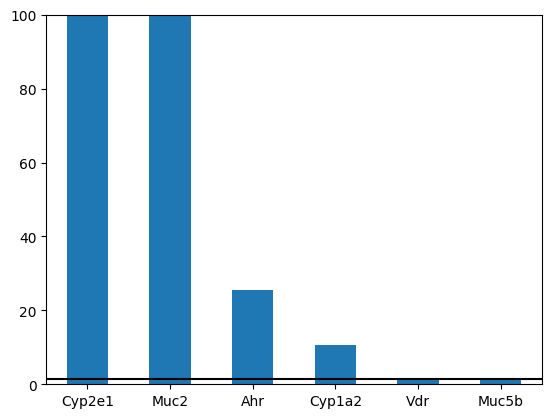

In [240]:
df_007['-LOG10_ADJP'].plot(kind='bar')
plt.xticks(np.arange(0,6), df_007['Symbol'])
plt.xticks(rotation='horizontal')
plt.axhline(1.35,color='black')
plt.ylim(0,100)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Cyp2e1'),
  Text(1, 0, 'Muc2'),
  Text(2, 0, 'Ahr'),
  Text(3, 0, 'Cyp1a2'),
  Text(4, 0, 'Vdr'),
  Text(5, 0, 'Muc5b')])

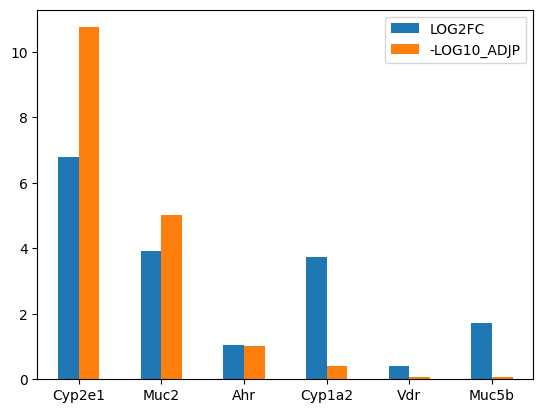

In [165]:
df_007[['LOG2FC','-LOG10_ADJP']].plot(kind='bar')
plt.xticks(np.arange(0,6), df_007['Symbol'])
plt.xticks(rotation='horizontal')

Text(0.5, 1.0, 'Volcano plot')

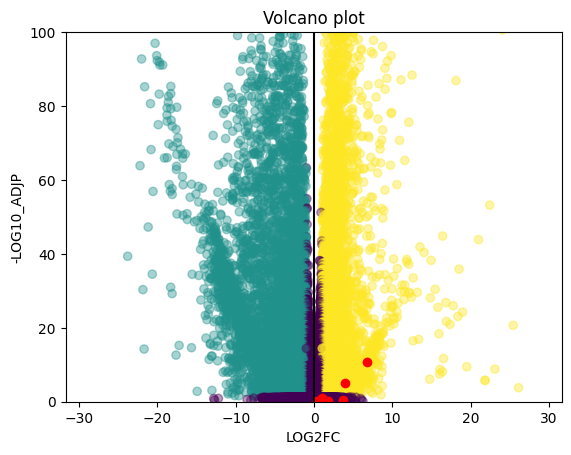

In [146]:
plt.scatter(y=df['-LOG10_ADJP'],x=df['LOG2FC'],c=df['Class'],alpha=0.4)
plt.axvline(0,color='black')
plt.scatter(x=df_007['LOG2FC'],y=df_007['-LOG10_ADJP'], color='red')
plt.ylim(0,100)
plt.ylabel('-LOG10_ADJP')
plt.xlabel('LOG2FC')
plt.title('Volcano plot')

In [147]:
final_plot_df=pd.DataFrame(index=df7['Symbol'].values,columns=df_007['Symbol'].values)

In [152]:
final_plot_df

,Cyp2e1,Muc2,Ahr,Cyp1a2,Vdr,Muc5b
Gm10925,NaN,NaN,NaN,NaN,NaN,NaN
Adgrb2,NaN,NaN,NaN,NaN,NaN,NaN
Slc32a1,NaN,NaN,NaN,NaN,NaN,NaN
Phactr3,NaN,NaN,NaN,NaN,NaN,NaN
Rps12-ps3,NaN,NaN,NaN,NaN,NaN,NaN
Gm14760,NaN,NaN,NaN,NaN,NaN,NaN
Elovl3,NaN,NaN,NaN,NaN,NaN,NaN
Lep,NaN,NaN,NaN,NaN,NaN,NaN
Adipoq,NaN,NaN,NaN,NaN,NaN,NaN
Cidec,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
df7

,level_0,index,ENSEMBL,Symbol,LOG2FC,PVAL,ADJP,-LOG10_ADJP,Class,SUM
0,0,1726,ENSMUSG00000100862,Gm10925,-28.830937,2.714803e-156,6.490251e-154,153.187739,1,124.356801
1,1,1855,ENSMUSG00000028782,Adgrb2,-23.913538,3.111346e-127,3.521790e-125,124.453237,1,100.539698
2,2,4484,ENSMUSG00000037771,Slc32a1,-23.790903,4.506758e-41,4.348693e-40,39.361641,1,15.570738
3,3,2026,ENSMUSG00000027525,Phactr3,-23.249410,1.503270e-107,1.002132e-105,104.999075,1,81.749665
4,4,3028,ENSMUSG00000067038,Rps12-ps3,-22.215613,6.997415e-66,1.368493e-64,63.863757,1,41.648145
5,5,12657,ENSMUSG00000081221,Gm14760,26.113803,7.543247e-05,1.652625e-04,3.781826,2,29.895629
6,6,2014,ENSMUSG00000038754,Elovl3,26.870668,1.112590e-108,7.637216e-107,106.117065,2,132.987733
7,7,1914,ENSMUSG00000059201,Lep,27.575706,7.816616e-120,7.130605e-118,117.146874,2,144.722580
8,8,1836,ENSMUSG00000022878,Adipoq,28.217161,7.344133e-129,9.011836e-127,126.045187,2,154.262348
9,9,1805,ENSMUSG00000030278,Cidec,28.728203,1.518264e-133,2.159205e-131,130.665706,2,159.393909


In [150]:
df9

,index,ENSEMBL,Symbol,LOG2FC,PVAL,ADJP,-LOG10_ADJP,Class,SUM
0,2187,ENSMUSG00000031376,Atp2b3,-22.014225,3.827212e-95,1.839450e-93,92.735312,1,70.721087
1,5462,ENSMUSG00000038255,Neurod2,-21.845792,6.532139e-32,4.702733e-31,30.327650,1,8.481858
2,725,ENSMUSG00000035383,Pmch,-21.692454,1.428004e-15,5.598954e-15,14.251893,1,-7.440561
3,2047,ENSMUSG00000033998,Kcnk1,-21.688683,1.383026e-105,8.776677e-104,103.056670,1,81.367987
4,2352,ENSMUSG00000056296,Synpr,-21.627107,1.598644e-87,5.974876e-86,85.223671,1,63.596564
5,3545,ENSMUSG00000028972,Car6,22.426466,4.425518e-55,6.342556e-54,53.197736,2,75.624202
6,9089,ENSMUSG00000078889,Gm14288,23.086779,4.827869e-10,1.475983e-09,8.830919,2,31.917697
7,2073,ENSMUSG00000001657,Hoxc8,24.057376,4.422181e-103,2.648724e-101,100.576963,2,124.634339
8,1838,ENSMUSG00000110613,Lncbate1,25.185542,8.937902e-129,1.087131e-126,125.963718,2,151.149260
9,7125,ENSMUSG00000078087,Rps12l1,25.416738,4.113621e-22,2.068521e-21,20.684340,2,46.101078


In [169]:
for i in range(df_007.shape[0]):
    l=[]
    for j in range(df7.shape[0]):
        l.append((abs(df7['SUM'][j]-df_007['SUM'][i])-150)*-1)
    final_plot_df[final_plot_df.columns[i]]=l


In [170]:
final_plot_df

,Cyp2e1,Muc2,Ahr,Cyp1a2,Vdr,Muc5b
Gm10925,43.167529,34.585833,27.706869,29.812447,26.125857,27.434515
Adgrb2,66.984632,58.402936,51.523971,53.629549,49.942960,51.251618
Slc32a1,148.046408,143.371896,136.492932,138.598509,134.911920,136.220578
Phactr3,85.774666,77.192970,70.314005,72.419583,68.732994,70.041652
Rps12-ps3,125.876185,117.294490,110.415525,112.521103,108.834513,110.143171
Gm14760,137.628701,129.047006,122.168041,124.273619,120.587030,121.895687
Elovl3,34.536597,25.954902,19.075937,21.181515,17.494926,18.803583
Lep,22.801750,14.220055,7.341090,9.446668,5.760079,7.068736
Adipoq,13.261982,4.680287,-2.198678,-0.093100,-3.779689,-2.471032
Cidec,8.130421,-0.451274,-7.330239,-5.224661,-8.911250,-7.602593


In [171]:
relative_heatmap_df=pd.DataFrame(columns=df_007['Symbol'],index=df_007['Symbol'])

In [172]:
relative_heatmap_df

Symbol,Cyp2e1,Muc2,Ahr,Cyp1a2,Vdr,Muc5b
Symbol,,,,,,
Cyp2e1,NaN,NaN,NaN,NaN,NaN,NaN
Muc2,NaN,NaN,NaN,NaN,NaN,NaN
Ahr,NaN,NaN,NaN,NaN,NaN,NaN
Cyp1a2,NaN,NaN,NaN,NaN,NaN,NaN
Vdr,NaN,NaN,NaN,NaN,NaN,NaN
Muc5b,NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
for i in range(df_007.shape[0]):
    l=[]
    for j in range(df_007.shape[0]):
        l.append((abs(df_007['SUM'][i]-df_007['SUM'][j])-150)*-1)
    relative_heatmap_df[relative_heatmap_df.columns[i]]=l


Text(50.722222222222214, 0.5, 'Gene name')

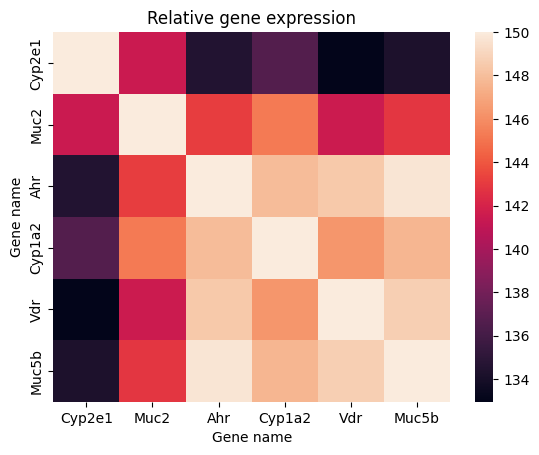

In [180]:
sns.heatmap(relative_heatmap_df)
plt.title('Relative gene expression')
plt.xlabel('Gene name')
plt.ylabel('Gene name')

Text(50.72222222222221, 0.5, 'Gene name')

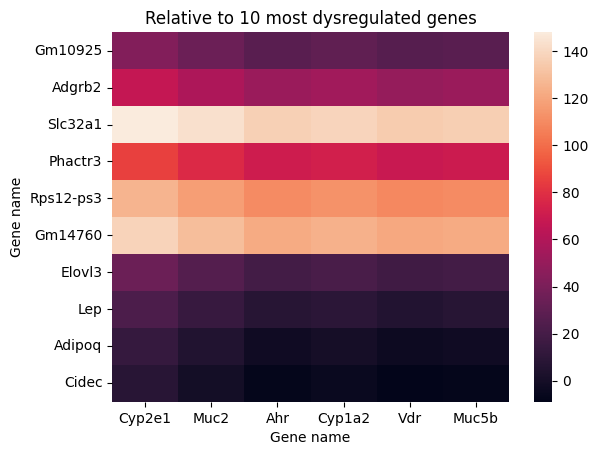

In [181]:
sns.heatmap(final_plot_df)
plt.title('Relative to 10 most dysregulated genes')
plt.xlabel('Gene name')
plt.ylabel('Gene name')

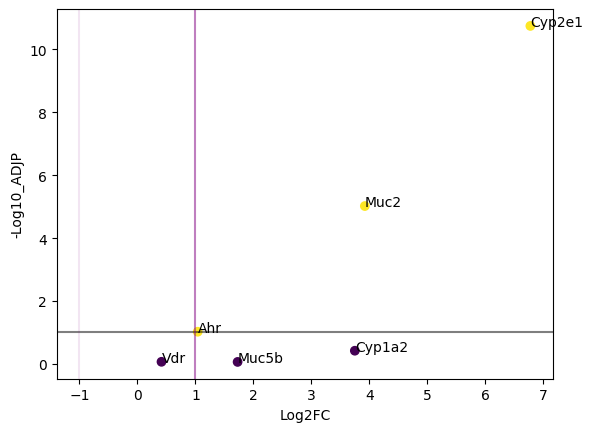

In [201]:

plt.xlabel('Log2FC')
plt.ylabel('-Log10_ADJP')
plt.axhline(1,color='Black',alpha=0.5)
plt.axvline(1, color='Purple',alpha=0.5)
plt.axvline(-1, color='Purple',alpha=0.1)
plt.scatter(x=df_007['LOG2FC'],y=df_007['-LOG10_ADJP'],c=df_007['Class'])
for i in range (df_007.shape[0]):
    plt.text(df_007['LOG2FC'].iloc[i],df_007['-LOG10_ADJP'].iloc[i],df_007['Symbol'].values[i])

In [198]:
for i in range(0,6):
    if df_007['Symbol'].iloc[i]=='Cyp1a2':
        df_007['Class'].iloc[i]=0

C:\Users\Akshat\AppData\Local\Temp\ipykernel_16552\376033443.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_007['Class'].iloc[i]=0
C:\Users\Akshat\AppData\Local\Temp\ipykernel_16552\376033443.py:3: SettingWithCopyWarning: 
A value is

In [199]:
df_007

,index,ENSEMBL,Symbol,LOG2FC,PVAL,ADJP,-LOG10_ADJP,Class,SUM
0,3519,ENSMUSG00000025479,Cyp2e1,6.775865,1.245948e-55,1.809986e-54,10.748465,2,17.524330
1,6251,ENSMUSG00000025515,Muc2,3.921684,1.314853e-26,7.856820e-26,5.020951,2,8.942635
2,11355,ENSMUSG00000019256,Ahr,1.039493,3.099972e-06,7.570308e-06,1.024177,2,2.063670
3,15067,ENSMUSG00000032310,Cyp1a2,3.749040,4.305632e-03,7.924328e-03,0.420208,0,4.169248
4,21292,ENSMUSG00000022479,Vdr,0.414889,3.518915e-01,4.583034e-01,0.067769,0,0.482658
5,21473,ENSMUSG00000066108,Muc5b,1.727349,3.707782e-01,4.788127e-01,0.063967,0,1.791316


In [202]:
df['Class'].value_counts()

Class
0    14806
1     7795
2     5131
Name: count, dtype: int64

In [203]:
7795+5131


12926

In [205]:
12926/(1806+12926)

0.46610413962209724

In [207]:
df.isnull().value_counts()

ENSEMBL  Symbol  LOG2FC  PVAL   ADJP   -LOG10_ADJP  Class
False    False   False   False  False  False        False    20496
         True    False   False  False  False        False     7236
Name: count, dtype: int64

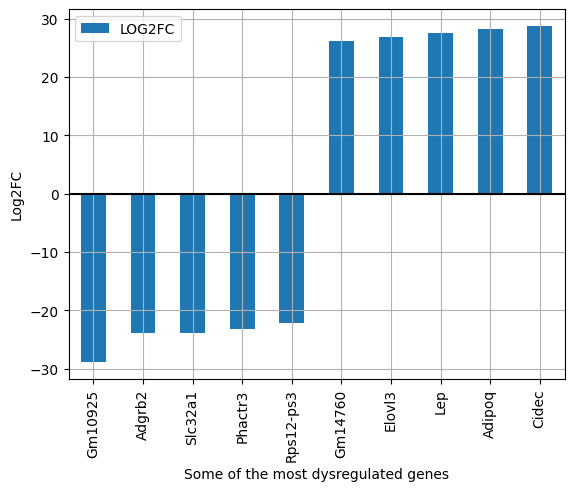

In [226]:
df7[['LOG2FC']].plot(kind='bar')
plt.axhline(0,color='black')
plt.grid()
plt.xlabel('Some of the most dysregulated genes')
plt.ylabel('Log2FC')
plt.xticks(np.arange(0,10),df7['Symbol'])
plt.show()